In [63]:
import pandas as pd
import seaborn as sns


Вот какие признаки вам удалось собрать:

country — страна-производитель вина.

description — подробное описание.

designation — название виноградника, где выращивают виноград для вина.

points — баллы, которыми WineEnthusiast оценил вино по шкале от 1 до 100.

price — стоимость бутылки вина.

province — провинция или штат.

region_1 — винодельческий район в провинции или штате (например Напа).

region_2 — конкретный регион. Иногда в пределах винодельческой зоны указываются более конкретные регионы (например Резерфорд в долине Напа), но это значение может быть пустым.

taster_name — имя сомелье.

taster_twitter_handle — твиттер сомелье.

title — название вина, которое часто содержит год и другую подробную информацию.

variety — сорт винограда, из которого изготовлено вино (например Пино Нуар).

winery — винодельня, которая производила вино.

Прочитаем наш файл с винными обзорами:

In [64]:
wine_df = pd.read_csv('data/wine.csv')
wine_df.shape[0]

129971

Количество сомелье принимавших участие в тесте?

In [65]:
wine_df['taster_name'].nunique()

19

Какая максимальна цена за бутылку вина?

In [66]:
wine_df['price'].max()

3300.0

Задание 5.2

Проанализируйте представленный датасет и перечислите все числовые признаки через запятую.

In [67]:
wine_df.info()
print('числовые столбцы points, price')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB
числовые столбцы points, price

Задание 5.3
Проанализируйте датасет на наличие дублирующихся винных обзоров. Если дублирующиеся записи есть, удалите их.

В поле ниже введите, сколько дублирующихся записей вам удалось обнаружить.

In [68]:
# создадим список колонок
wine_df_list = list(wine_df.columns)

In [69]:
# создадим маску фильтрации
mask = wine_df.duplicated(subset = wine_df_list)

In [70]:
# все дублирующие записи сохраним в отдельный датафрейм
wine_df_dublicates = wine_df[mask]
print('Число дубликатов', wine_df_dublicates.shape[0])


Число дубликатов 9983


In [71]:
# удалим дублирующие записи
wine_df = wine_df.drop_duplicates(subset=wine_df_list)
wine_df.shape[0]

119988

Список столбцов с пропусками

In [72]:
wine_df_null = wine_df.isnull().mean()*100

In [73]:
wine_df_null = wine_df_null[wine_df_null>0].sort_values(ascending=False) # получаем список столбцов с пропусками в процентном соотношении
wine_df_null

region_2                 61.021936
designation              28.790379
taster_twitter_handle    24.540787
taster_name              20.766243
region_1                 16.301630
price                     6.996533
country                   0.049172
province                  0.049172
variety                   0.000833
dtype: float64

Задание 5.5
Обработайте пропущенные значения в наборе данных любым известным вам способом, который вы изучили в модуле PYTHON-14. Очистка данных.

Воспользуйтесь правилами:

Если какой-то из признаков имеет более 30-40 % пропусков, лучше избавьтесь от него: его заполнение может привести к сильному искажению общего распределения, а удаление записей — к большой утрате данных.
Заполняйте данные с умом! Если перед вами количественный признак, то использование нецелого числа в качестве константы является как минимум нелогичным.
Вы можете оставить пропуски как есть, просто заменив их на какой-то специальный символ. Например, для числовых неотрицательных признаков можно использовать число -1, а для категориальных — строку 'unknown'.

<AxesSubplot: >

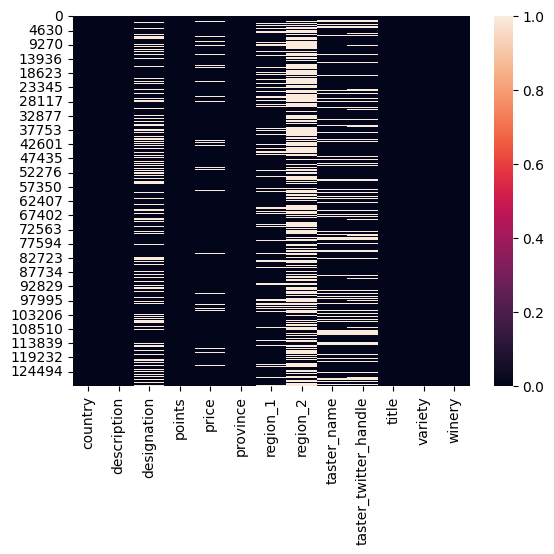

In [74]:
#построим тепловую карту пропусков
sns.heatmap(wine_df.isnull())

In [75]:
fill_wine_df = wine_df.copy() # создаем копию датафрейма

In [76]:
# удалим столбец region_2 так как количество пропусков в нем больше 40%
fill_wine_df = wine_df.drop('region_2', axis=1)
fill_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119988 entries, 0 to 129970
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                119929 non-null  object 
 1   description            119988 non-null  object 
 2   designation            85443 non-null   object 
 3   points                 119988 non-null  int64  
 4   price                  111593 non-null  float64
 5   province               119929 non-null  object 
 6   region_1               100428 non-null  object 
 7   taster_name            95071 non-null   object 
 8   taster_twitter_handle  90542 non-null   object 
 9   title                  119988 non-null  object 
 10  variety                119987 non-null  object 
 11  winery                 119988 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 11.9+ MB


Заполним пропуски категориальных данных: -  значением 'unknow'

+ region_2                 61.021936
+ designation              28.790379
+ taster_twitter_handle    24.540787
+ taster_name              20.766243
+ region_1                 16.301630 

                                    

Столбцы с небольшим количеством пропусков заполним значениями самым распространенным. 
+ country                   0.049172
+ province                  0.049172
+ variety                   0.000833

Пропуски столбца price  заполним средним значением                

In [77]:
# определим самые распространенные значения столбцов country , province , variety
country_most = wine_df['country'].mode() 
province_most = wine_df['province'].mode()
variety_most = wine_df['variety'].mode()
display( 'распространенные значения столбцов country , province , variety:', country_most, province_most, variety_most)

'распространенные значения столбцов country , province , variety:'

0    US
Name: country, dtype: object

0    California
Name: province, dtype: object

0    Pinot Noir
Name: variety, dtype: object

In [78]:
value = { 'designation' : 'unknow', 'taster_twitter_handle' : 'unknow', 'taster_name': 'unknow',
       'region_1': 'unknow', 'price': wine_df['price'].mean(), 'country': 'California', 'province': 'US', 'variety': 'Pinot Noir' }


In [79]:
fill_wine_df = fill_wine_df.fillna(value=value)

<AxesSubplot: >

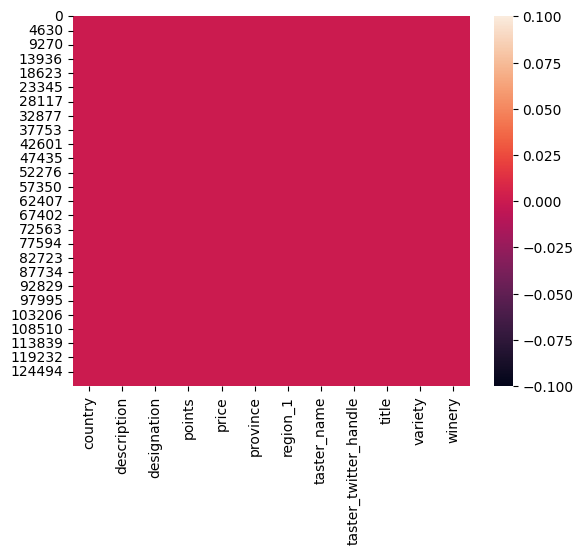

In [80]:
sns.heatmap(fill_wine_df.isnull())

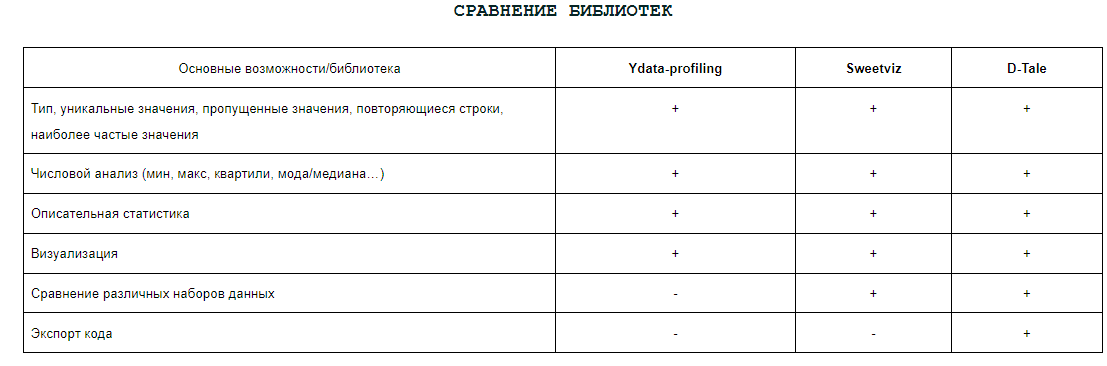

Задание 2.1

Вычислите наименьший балл за вино в датасете.

In [81]:
fill_wine_df['points'].min()

80

Задание 2.2

Вычислите наименьшую цену за бутылку в наборе данных

In [82]:
fill_wine_df['price'].min()

4.0

Мера центральной тенденции — это число, которое описывает так называемое «среднее» признака. Мера центральной тенденции может рассчитываться по-разному в зависимости от типа признака или от его распределения.

Далее мы рассмотрим наиболее популярные меры центральной тенденции, используемые в машинном обучении: среднее арифметическое, медиана, мода. Для расчёта этих описательных статистик в Python мы будем пользоваться библиотекой statistics. Она предоставляет готовые функции для вычисления математической статистики для числовых данных.

Установим библиотеку:

pip install statistics
Импортируем библиотеку для дальнейшего использования:

import statistics

In [83]:
!pip instal statistics

ERROR: unknown command "instal" - maybe you meant "install"



In [84]:
import statistics

СРЕДНЕЕ АРИФМЕТИЧЕСКОЕ
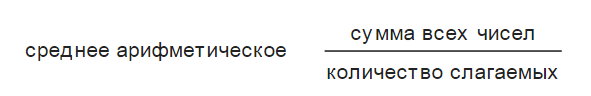


Среднее арифметическое — сумма всех элементов, поделённая на количество элементов в числовом ряду или признаке (Series).

Задание 2.3

Вычислите среднюю стоимость бутылки вина при помощи функции statistics.mean() библиотеки statistics. Округлите значение до сотых.

In [85]:
round(statistics.mean(wine_df['price']),2)

nan

Задание 2.4

Вычислите среднюю стоимость бутылки вина при помощи стандартных функций Python.

Вставьте получившийся код

In [86]:
mean = sum(fill_wine_df['price']) / len(fill_wine_df['price'])
mean

35.620746821039944

In [87]:
round(wine_df['price'].mean(),2)

35.62

Среднее арифметическое хорошо работает для признаков с небольшим разбросом в значениях, например чтобы корректно вычислять средний возраст популяции. Однако оно плохо работает для признака с большим разбросом в значениях. 

МЕДИАНА

Медиана — средний элемент распределения. Для расчёта медианы должно выполняться одно условие: числовой ряд должен быть предварительно отсортирован. Только так мы сможем корректно рассчитать средний элемент. Признак может быть отсортирован как по возрастанию, так и по убыванию. 

Методы современных библиотек, в том числе и используемой нами statistics для вычисления медианы, самостоятельно выполняют сортировку данных — вам не нужно заботиться об этом.

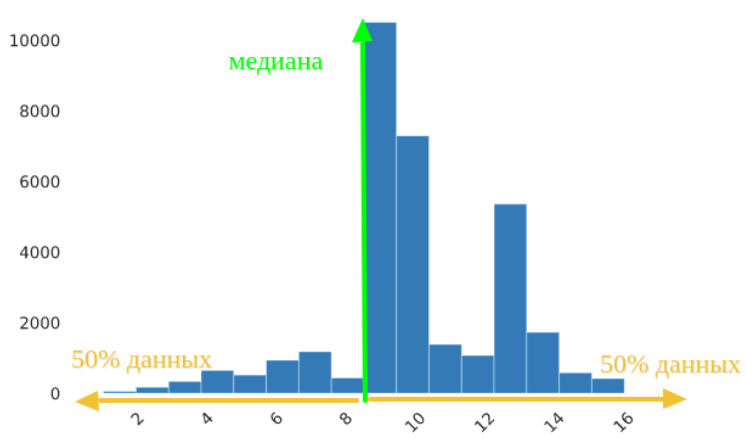

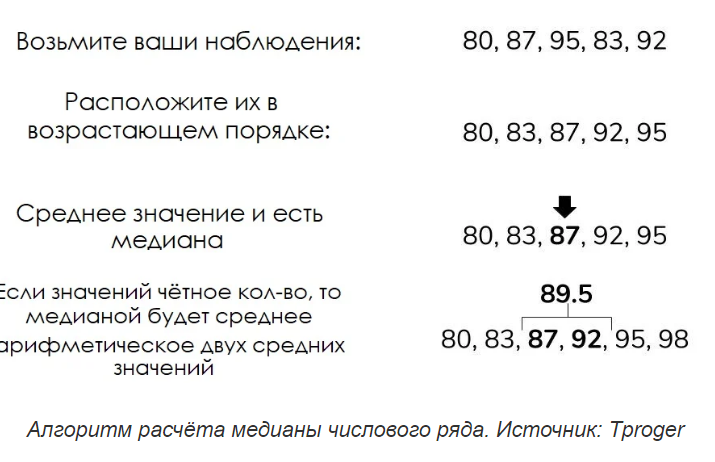

Задание 2.5


Вычислите медиану стоимости бутылки вина при помощи функции statistics.median() библиотеки statistics. Округлите значение до сотых

In [88]:
statistics.median(fill_wine_df['price'])

28.0

Задание 2.5

Вычислите медиану стоимости бутылки вина при помощи функции statistics.median() библиотеки statistics.

In [89]:
count_price = len(fill_wine_df['price']) # количество записей цен
sorted_price = sorted(fill_wine_df['price']) # отсортированные цены

if count_price % 2: # при нечетном кол-ве элементов выбираем средний по индексу 
    median = sorted_price[round(0.5*(count_price-1))]
else: # при четном кол-ве элементов выбираем 2 средних по индексу и считаем между ними среднее арифметическое
    index = round(0.5 * count_price)
    median_ = 0.5 * (sorted_price[index-1] + sorted_price[index])
median

NameError: name 'median' is not defined

In [ ]:
fill_wine_df['price'].median()

28.0

Также в библиотеке statistics есть функции, связанные с медианой, — функция statistics.median_low() и функция statistics.median_high().

→ В случае, когда количество элементов в числовом ряду (серии) нечётное, функции возвращают то же, что и median().

В случае, когда количество элементов чётное, у нас получается два средних значения:

median_low() возвращает меньшее из них;
median_high() возвращает большее из них.
Примечание. Если в вашем наборе данных есть пропущенные значения, функции библиотеки statistics в отличие от других методов (например np.median() из библиотеки numpy) будут автоматически игнорировать пропущенные значения, не выдавая ошибку.

МОДА

Мода — самый часто встречающийся элемент в числовом ряду.

Допустим, вы решили полететь в отпуск со своими друзьями и решили выбрать месяц. Вы провели опрос, кому в какой месяц было бы удобнее. Месяцы в году — это числовой ряд от 1 до 12. Дима и Серёжа свободны в феврале. Толя может взять отпуск в любой месяц года, а Ксюша может только в июне. Как в этом случае поступите вы?

Очевидно, выберете месяц, который выбрало большинство; остальные подстроятся либо не полетят с вами.

Чаще всего мода используется в нечисловых рядах. Например самая популярная порода собак, фильм года, лучшие рестораны вычисляются именно модой.

Задание 2.7

Вычислите моду стоимости бутылки (самую часто встречающуюся цену) вина при помощи функции statistics.mode() библиотеки statistics. Округлите значение до сотых.

In [ ]:
round(statistics.mode(fill_wine_df['price']),2)

35.36

Моду также можно вычислить при помощи statistics.multimode(). В случае наличия нескольких модовых (популярных значений) функция statistics.mode() вернёт вам ошибку StatisticsError, а statistics.multimode() — список с всеми вычисленными модовыми значениями.

In [ ]:
round(wine_df['price'].mode())

0    20.0
Name: price, dtype: float64

In [ ]:
mode = round(fill_wine_df["price"].value_counts().index[0],2)
mode

35.62

Задание 3.3
1 point possible (graded)
Для расчёта коэффициента корреляции применим функцию df.corr() библиотеки pandas.

data.corr()

Вычислите коэффициент корреляции между переменными в датасете винных обзоров. В ответ запишите величину коэффициента корреляции между ценой за бутылку и баллами за вино. Округлите ответ до шести знаков после запятой.

In [ ]:
fill_wine_df.corr(method='pearson', ('price', 'points'))

SyntaxError: positional argument follows keyword argument (977570965.py, line 1)

In [ ]:
fill_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119988 entries, 0 to 129970
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                119988 non-null  object 
 1   description            119988 non-null  object 
 2   designation            119988 non-null  object 
 3   points                 119988 non-null  int64  
 4   price                  119988 non-null  float64
 5   province               119988 non-null  object 
 6   region_1               119988 non-null  object 
 7   taster_name            119988 non-null  object 
 8   taster_twitter_handle  119988 non-null  object 
 9   title                  119988 non-null  object 
 10  variety                119988 non-null  object 
 11  winery                 119988 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 11.9+ MB


In [ ]:
fill_wine_df.corr()

C:\Users\Maksym\AppData\Local\Temp\ipykernel_3136\3517300733.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fill_wine_df.corr()


,points,price
points,1.000000,0.402458
price,0.402458,1.000000


КОРРЕЛЯЦИЯ ПИРСОНА

Рассчитав в прошлом юните коэффициент корреляции между point и price, мы использовали df.corr(). Согласно документации, если не указать method, по умолчанию используется корреляция Пирсона. Верно ли это для наших признаков?

Коэффициент корреляции Пирсона используется для вычисления линейной взаимосвязи между признаками. 

Линейная взаимосвязь — вид связи между признаками, в котором изменение одного признака  всегда приводит к изменению другого признака  на величину, пропорциональную изменению , в соответствии с правилом:  (уравнение прямой), где  и  — некоторые коэффициенты.

для большинства непрерывных признаков это подходящий метод вычисления коэффициента корреляции. Однако при его использовании вы предполагаете, что признаки приблизительно нормально распределены и не имеют выбросов.

НОРМАЛЬНОЕ РАСПРЕДЕЛЕНИЕ

Большинство окружающих нас процессов и явлений, характеристик объектов можно описать нормальным распределением. В основном это переменные, которые зависят от множества факторов, например рост человека. Он сформировался благодаря местности, в которой проживает человек, генетическим предрасположенностям, перенесённым заболеваниям и так далее. Как следствие, показатели роста подвергаются законам нормального распределения.

Если признак является совокупностью очень редких событий, например аварии на дорогах, то распределение признака нормальным не будет.

С точки зрения визуализации нормальное (гауссово) распределение представляет собой распределение признака в виде колокола.

Нормальность распределения признака можно определить визуально, построив гистограмму распределения непрерывного признака или так называемый q-q plot. Подробнее о принципе построения данного графика советуем прочитать здесь.





Cхематичное изображение нормального распределения, график q-q plot.

На гистограмме распределение должно напоминать колокол (левый график на рисунке), а q-q plot должен напоминать прямую линию (правый график на рисунке).

In [ ]:
#Код для построения графиков:
import matplotlib.pyplot as plt
from scipy import stats


<function matplotlib.pyplot.show(close=None, block=None)>

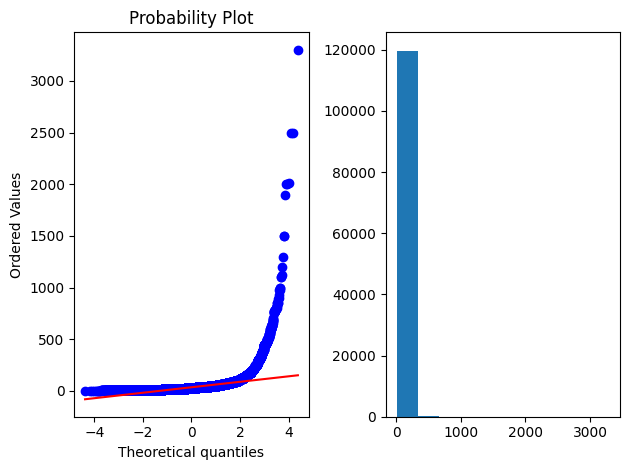

In [ ]:
plt.subplot(1,2,1) # создаем сетку для графиков
stats.probplot(fill_wine_df['price'], plot = plt) # создаем график qq plot
plt.subplot(1,2,2)
plt.hist(fill_wine_df['price'])# гистограмма распределения признака
plt.tight_layout() # чтобы графики не наезжали друг на друга используем метод tight_layout
plt.show # показать график


Задание 4.2
1 point possible (graded)
Постройте приведённые выше графики для признака points из датасета винных обзоров и выберите верное утверждение:

<function matplotlib.pyplot.show(close=None, block=None)>

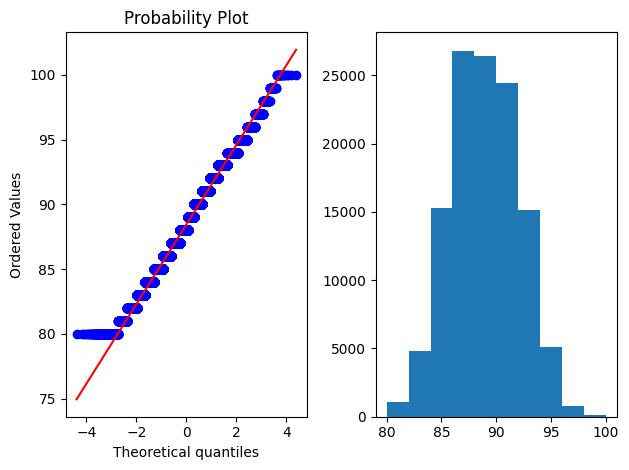

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

plt.subplot(1,2,1) # создаем сетку для графиков
stats.probplot(fill_wine_df['points'], plot = plt) # строим график qq plot
plt.subplot(1,2,2) # располагаем второй рисунок рядом
plt.hist(fill_wine_df['points']) # гистограмма распределения признака оценки вина
plt.tight_layout() # чтобы графики на накладывались друг на друга
plt.show # показать графики

Признак "оценки вина" нормально распределен

Задание 5.1
1 point possible (graded)
Рассчитайте коэффициент корреляции Спирмена для признаков point и price. Ответ округлите до сотых.

In [90]:
fill_wine_df.corr(method='spearman')

C:\Users\Maksym\AppData\Local\Temp\ipykernel_7236\3610317500.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fill_wine_df.corr(method='spearman')


,points,price
points,1.000000,0.588048
price,0.588048,1.000000


Задание 5.2
1 point possible (graded)
Рассчитайте коэффициент корреляции Кендалла для признаков point и price. Ответ округлите до сотых.

In [91]:
fill_wine_df.corr(method='kendall')

C:\Users\Maksym\AppData\Local\Temp\ipykernel_7236\3363571848.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fill_wine_df.corr(method='kendall')


,points,price
points,1.000000,0.438761
price,0.438761,1.000000


In [93]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [94]:
from sklearn.metrics import matthews_corrcoef

In [98]:
x = [+1,-1,+1,+1]
y = [+1,+1,+1,-1]
round(matthews_corrcoef(x,y),2)

-0.33